# Линейная алгебра. Лабораторная работа 1, осень 2021


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [4]:
!pip install matplotlib


     |████████████████████████████████| 11.2 MB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 873 kB 12.9 MB/s eta 0:00:01


In [5]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [6]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)` и `np.dot(A, B)`, `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1.   В первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;
2.   Поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была -- как они справлялись;
3.   Попросите помощи у вашего учебного ассистента.

Важно искать помощь именно в таком порядке! Если ни один из шагов выше не помог или вы столкнулись с ситуацией, в которой вам заведомо не поможет ни один из пунктов выше (например, в задании вас просят доказать заведомо ложное утверждение), тогда можете написать сюда: st-fedotov@yandex-team.ru (Станислав Федотов, выступал перед выдачей лабораторной), или сюда: [@johanDDC](https://t.me/johanDDC) (Ваня Пешехонов, ассистент курса).



**И всё-таки задание**

**Задание 1.1 [0.2 за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [7]:
null = np.zeros((3, 4))
print(null)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [8]:

diag = np.diag([1, 2, 3, 4, 5])

print(diag)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [9]:
print(diag.trace())

15


In [10]:
print(sla.inv(diag))

[[ 1.          0.         -0.          0.         -0.        ]
 [ 0.          0.5        -0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [11]:
x = np.random.rand(4, 5)

print(x)

[[0.59297417 0.96871467 0.31847275 0.11892697 0.91125794]
 [0.89521064 0.39498761 0.48555938 0.10414372 0.84753328]
 [0.31962549 0.47683604 0.90154253 0.04138907 0.80481359]
 [0.21371613 0.12471151 0.34028683 0.51303325 0.34722111]]


In [12]:
rows = [2, 3]
columns = [1, 2]

y = x[np.ix_(rows, columns)]

print(sla.det(y))

0.049828295770422616


In [13]:
print(x.dot(x.T))

[[2.23598602 1.85281143 1.6768795  0.73333158]
 [1.85281143 1.92234379 1.59864561 0.75352056]
 [1.6768795  1.59864561 1.79174997 0.73524135]
 [0.73333158 0.75352056 0.73524135 0.56078829]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [0.75 баллов]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [16]:
def mx(m, col, sign):
    ''' поднимаем строку с главным элементом'''
    mx_el = m[col][col]
    mx_r = col
    m1 = m.copy()
    for i in range(col + 1, len(m)):
        if abs(m[i][col]) > abs(mx_el):
            mx_el = m[i][col]
            mx_r = i
    if mx_r != col:
        m[col], m[mx_r] = m1[mx_r], m1[col]
        sign *= (-1)
    return (m, sign)

def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    m = X.copy()
    sign = 1
    n = m.shape[0]
    p = m.shape[1]
    if p != n:
      raise ValueError
    else:
      for k in range(n - 1):
        tmp = mx(m, k, sign)
        m = tmp[0]
        sign = tmp[1]
        for i in range(k + 1, n):
          m1 = m.copy()
          devisor = m1[i][k] / m1[k][k]
          m1[i][-1] -= devisor * m1[k][-1]
          for j in range(k, n):
            m[i][j] -= devisor * m[k][j]
    det = sign
    for i in range(n):
      det *= m[i][i]
    return det
print(my_det(X))

-1


Простая проверка:

In [15]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(np.linalg.det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [17]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

7.61 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
197 µs ± 1.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
152 µs ± 32.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
140 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.81 ms ± 593 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<ipython-input-16-e444a74f745a>:45: RuntimeWarning: overflow encountered in double_scalars
  det *= m[i][i]


5min 30s ± 33.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


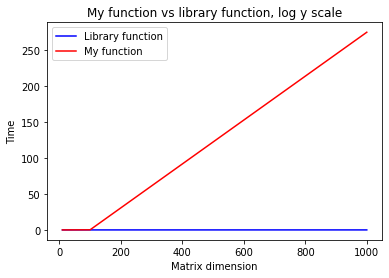

In [18]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

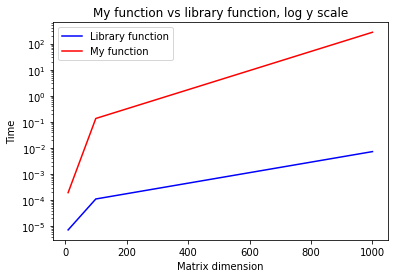

In [19]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.5 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [20]:
# Your code here

a = np.array([[1, 0], [int(1e20), 1]])
b = np.array([[1 / int(1e20), 1], [0, 1 - int(1e20)]])

c = np.array([[1.0, 0.0], [1e20, 1.0]])
d = np.array([[1e-20, 1.0], [0.0, 1 - 1e20]])

print(a.dot(b))
print(c.dot(d))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
**Первый в выводе(проверяется ручками)**

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [21]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    for i in range(dim):
      P[0][i] = 1
      P[i][0] = 1
    for i in range(1, dim):
      for j in range(1, dim):
        P[i][j] = P[i - 1][j] + P[i][j - 1]
    # Your code here
    
    return P
my_pascal(5)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  4.,  5.],
       [ 1.,  3.,  6., 10., 15.],
       [ 1.,  4., 10., 20., 35.],
       [ 1.,  5., 15., 35., 70.]])

Чему равен её определитель? Строго поясните свой ответ.

----
**Ваше решение**
с помощью элементарных преобразований, вычитая строки можно добиться того, что наша матрица паскаля станет единичной того же размера, из чего следует, что ее определтель будет равен единице. 

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [22]:
# Your code here
p = sla.pascal(30)
sla.det(p)

-3.400444993542751e+51

Разница заметна невооружённым взглядом!

Как вы помните из лекций, квадратная матрица называется вырожденной, если её определитель равен нулю. На практике часто приходится иметь дело с матрицами, "близкими" к вырожденным. Вырожденные и близкие к вырожденным матрицы обладают мерзким свойством численной неустойчивости. Что такое численная неустойчивость? Скажем, пусть мы решаем систему $Ax = b$, и пусть $\dot x$ -- её частное решение. Теперь предположим, что правая часть системы немного испортилась (например, если правая часть -- это выход какого-то алгоритма, то тогда она может испортиться из-за неточных вычислений в этом алгоритме), и теперь мы решаем систему $Ax = b + \Delta b$. Если элементы вектора $\Delta b$ невелики по модулю, нам бы очень хотелось, чтобы и решение новой системы не сильно отличалось от решения исходной системы. Именно это мы и будем называть численной устойчивостью.

**Задание 3.3 [0.15 балла]** Дана система
$$
\begin{cases}
x_1 + 1000x_2 = 2004\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$
Найдите решение этой системы (можно устно). Найдите определитель её матрицы коэффициентов.

In [25]:
# Your code here
A = np.array([[1, 1000], [100, 100001]])
B = np.array([[2004], [200402]])
c = sla.solve(A, B)
print(c[0] * c[1])
print(sla.det(A))

[8.]
1.0000000000047748


Теперь немного испортим правую часть этой системы, пусть теперь она имеет вид
$$
\begin{cases}
x_1 + 1000x_2 = 2004.01\\
100x_1 + 100001x_2 = 200402
\end{cases}
$$

Найдите решение системы с испорченной правой частью. Сравните решения исходной и новой систем. Что вы можете сказать?

In [26]:
# Your code here
A = np.array([[1, 1000], [100, 100001]])
B = np.array([[2004.01], [200402]])
c = sla.solve(A, B)
print(c[0] * c[1])
print(sla.det(A))

[1004.01]
1.0000000000047748


Оказывается, что значение определителя довольно плохо измеряет степень отклонения данной матрицы от вырожденной. Хорошей метрикой в этом плане является число обусловленности матрицы.

**Определение**. Пусть $A$ -- квадратная матрица порядка $n$. Числом обусловленности матрицы $A$ назовём число $\mathrm{cond}(A)$, определяемое по формуле
$$
\mathrm{cond}(A) = \sqrt{\mathrm{tr}(A^TA)\mathrm{tr}((A^{-1})^TA^{-1})}
$$
Если матрица вырожденна, то $\mathrm{cond}(A)$ положим равным бесконечности.

Как можно догадаться из определения, матрица тем ближе к вырожденной, чем больше её число обусловленности, ведь у вырожденной матрицы это число равно бесконечности!

**Задание 3.4 [0.2 баллов]** Напишите функцию, которая для заданной матрицы $A$ возвращает её число обусловленности. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [30]:
def my_cond(A):
    '''
    Parameters
    ----------
    A : array_like
    
    Returns
    -------
    cond : float
          Condition number of A.
    '''
    
    # Your code here
    
    n, m = A.shape

    from math import sqrt

    if n != m:
      raise ValueError
    else:
      x = A.T * A
      if sla.det(A) == 0:
        return 1e35
      y = sla.inv(A).T * sla.inv(A)
      cond = sqrt(np.trace(x) * np.trace(y))
    return cond


Посчитайте число обусловленности матрицы из задания 3.3.

In [31]:
# Your code here
A = np.array([[1, 1000], [100, 100001]])
print(my_cond(A))

10000200002.009094


Постройте график зависимости числа обусловленности матрицы Паскаля от размера $n \in [5, 30]$.

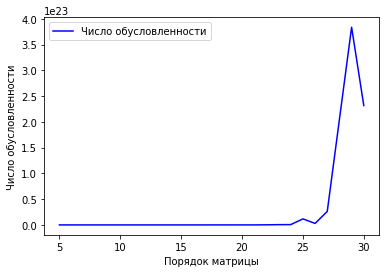

In [32]:
# Your code here
arr_res = []
dimensions = [x for x in range(5, 31)]
for dim in dimensions:
    A = my_pascal(dim)
    res = my_cond(A) 
    arr_res.append(res)    

plt.plot(dimensions, arr_res, color='blue', label='Число обусловленности')
plt.title('')
plt.ylabel('Число обусловленности')
plt.xlabel('Порядок матрицы')
plt.legend()

Как видите, посчитанные выше числа обусловленности весьма велики, что вполне согласуется с численными эффектами, которые вы наблюдали ранее при работе с соответствующими матрицами.

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [33]:
# Your code here
def prod(A):
  return A.diagonal().prod()

def stupid_check(A):
  x = 1
  for i in range(A.shape[0]):
    x *= A[i][i]
  return x

for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(prod(X) - stupid_check(X)) > 1e-6:
        print('FAILED')

In [34]:
def sq_sum(A):
  return sum(A.diagonal() ** 2)

def stupid_check(A):
  x = 0
  for i in range(A.shape[0]):
    x += (A[i][i] ** 2)
  return x

for _ in range(10):
    X = np.random.rand(8, 8)
    if np.abs(sq_sum(X) - stupid_check(X)) > 1e-6:
        print('FAILED')

**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы, $\lambda_1, \ldots, \lambda_n$ --- некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [36]:
# Your code here
def f(A, B, lmbd, k):
  k = min(A.shape[1], k)
  B = B.T
  return sum(np.sum(A[:k] * B[:k], axis=1) * lmbd)


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [35]:
# Your code here
def get_diag(A, B):
  x = A.diagonal()
  y = B.diagonal()
  return (x * y)

def stupid_check(A, B):
  C = A.dot(B)
  return C.diagonal()
for _ in range(10):
    X = np.random.rand(8, 8)
    Y = np.random.rand(8, 8)
    if sum(np.abs(get_diag(X, Y)) - sum(stupid_check(X, Y)) > 1e-6):
        print('FAILED')

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.75 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.75 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.75 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [102]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v0 = (x.real - a.real) * coef
    v1 = (x.imag - a.imag) * coef
    v0 = v0 * np.cos(angle) - v1 * np.sin(angle)
    v1 = v0 * np.sin(angle) + v1 * np.cos(angle)
    return v0 + a.real + (v1 + a.imag) * 1j

def shrink_rotate_conj(x, a, coef=1., angle=0.):
    a, x = x, a
    x2, y2 = x.real, x.imag
    x1, y1 = a.real, a.imag
    v = np.array([[(x2 - x1) * coef], [(y2 - y1) * coef]])
    v[0] = v[0] * np.cos(angle) + v[1] * np.sin(angle)
    v[1] = -v[0] * np.sin(angle) + v[1] * np.cos(angle)
    A = (x2 * coef * np.cos(angle) + y2 * np.sin(angle), -x2 * coef * np.sin(angle) + y2 * np.cos(angle))
    cs = 1j
    сs = (A[0] * v[0] + A[1] * v[1]) / (((A[0] ** 2 + A[1] ** 2) ** .5) * ((v[0] ** 2 + v[1] ** 2) ** .5))
    alpha = np.arccos(cs)
    v[0] = v[0] * np.cos(2 * alpha) - v[1] * np.sin(2 * alpha)
    v[1] = v[0] * np.sin(2 * alpha) + v[1] * np.cos(2 * alpha)
    return v
print(shrink_rotate_conj((10 + 5j), (2 + 4j), angle=45))
def geometric_inverse(x, a, r):
    z = x
    z2 = r ** 2 * z / (abs(z) ** 2)
    return a + z2
    
print(geometric_inverse((10 + 6j), (1 + 2j), 20))

[[ 15.16043831]
 [-11.32410442]]
(30.41176470588235+19.647058823529413j)


<ipython-input-102-24bf3852ca59>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  v[0] = v[0] * np.cos(2 * alpha) - v[1] * np.sin(2 * alpha)
<ipython-input-102-24bf3852ca59>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  v[1] = v[0] * np.sin(2 * alpha) + v[1] * np.cos(2 * alpha)


**Задание 5.4 [0.5 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

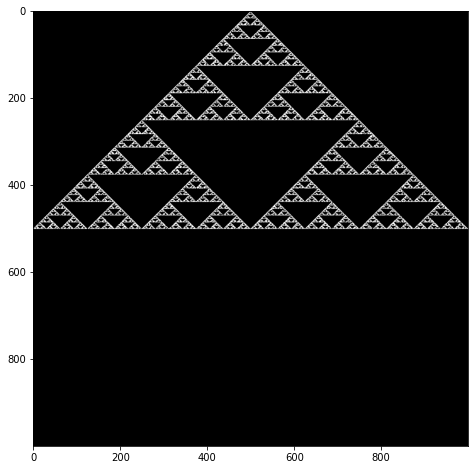

In [119]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]
arr = [[0] * 1000 for i in range(1000)]
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        arr[int(-500*z.imag - 500)][int(500*z.real + 500)] = 1


plt.figure(figsize=(8, 8))
plt.imshow(arr, cmap='gray')
    

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.



---
на каждом шагу мы применяем трижды функцию, которая коструирует равносторонний треугольник, за счет коэффициентов и итератора меняется размер треугольников и получается треугольник Серпинского 

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

In [ ]:
# Your code here

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

45.4 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12 µs ± 260 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
80.4 µs ± 9.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
46.2 µs ± 371 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
235 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
384 µs ± 52.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
686 µs ± 63.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
27.5 ms ± 9.56 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.01 ms ± 506 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 5.71 times longer than the fastest. This could mean that an intermediate result is being cached.
66.7 ms ± 35.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
32.8 ms ± 11.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
130 ms ± 9.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


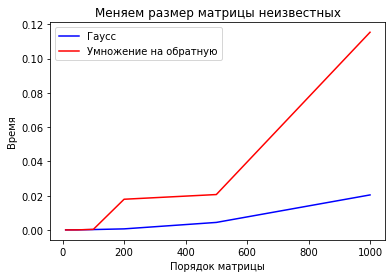

In [125]:
# Your code here
m = 10
gauss_times = []
dot_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    B = np.random.rand(dim, m)
    res_lib = %timeit -o sla.solve(A, B)
    gauss_times.append(res_lib.best)
    res_my = %timeit -o sla.inv(A).dot(B)
    dot_times.append(res_my.best)    

plt.plot(dimensions, gauss_times, color='blue', label='Гаусс')
plt.plot(dimensions, dot_times, color='red', label='Умножение на обратную')
plt.title('Меняем размер матрицы неизвестных')
plt.ylabel('Время')
plt.xlabel('Порядок матрицы')
plt.legend()

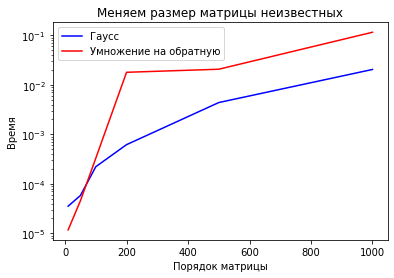

In [126]:
plt.semilogy(dimensions, gauss_times, color='blue', label='Гаусс')
plt.semilogy(dimensions, dot_times, color='red', label='Умножение на обратную')
plt.title('Меняем размер матрицы неизвестных')
plt.ylabel('Время')
plt.xlabel('Порядок матрицы')
plt.legend()

246 µs ± 63.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
415 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
240 µs ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 51.18 times longer than the fastest. This could mean that an intermediate result is being cached.
12.2 ms ± 17.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
388 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.91 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
603 µs ± 55.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
The slowest run took 13.86 times longer than the fastest. This could mean that an intermediate result is being cached.
6.39 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
885 µs ± 38.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
10.5 ms ± 3.54 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.58 ms ± 251 µs per loop (mean ± std. dev. 

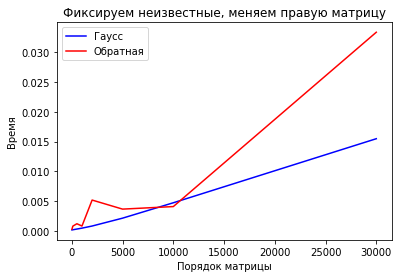

In [135]:
# Your code here
n = 100
gauss_times = []
dot_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000, 30000]
for dim in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, dim)
    res_lib = %timeit -o sla.solve(A, B)
    gauss_times.append(res_lib.best)
    res_my = %timeit -o sla.inv(A).dot(B)
    dot_times.append(res_my.best)    

plt.plot(dimensions, gauss_times, color='blue', label='Гаусс')
plt.plot(dimensions, dot_times, color='red', label='Обратная')
plt.title('Фиксируем неизвестные, меняем правую матрицу')
plt.ylabel('Время')
plt.xlabel('Порядок матрицы')
plt.legend()

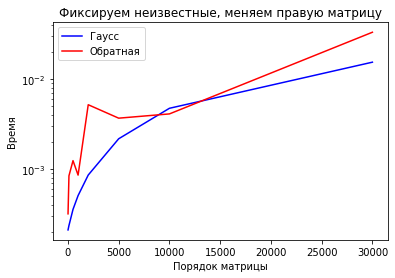

In [136]:
plt.semilogy(dimensions, gauss_times, color='blue', label='Гаусс')
plt.semilogy(dimensions, dot_times, color='red', label='Обратная')
plt.title('Фиксируем неизвестные, меняем правую матрицу')
plt.ylabel('Время')
plt.xlabel('Порядок матрицы')
plt.legend()

Судя по графикам, которые мы получили, при небольших размерах правых матриц и росте размера матрицы коэффициентов, лучше применять умножение на обратную матрицу. 

Однако, если размер матрицы коэффициентов не велик, а размер правой матрицы растет, метод Гаусса уступит умножению на обратную на больших размерах матриц, но все же уступит.

Если я правильно понимаю, это связано с тем, что перемножение матриц происходит быстрее, чем метод Гаусса(O(n^2.5) vs O(n^3)), исходя из чего решение уравнений через обратную матрицу ассимптотически эффективнее, тк поиск обратной имеет сложность между O(n^2) и O(n^3).

Однако же, для небольших n метод Гаусса будет выигрывать судя по всему благодаря своей константе, а вот какие n называть малыми зависит уже от того, что мы меняем: матрицу коэффициентов или правую. 